In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import *
% matplotlib inline

In [2]:
# load moddel results
lda_df = pd.read_csv('../data/Wikipedia-lda.csv', index_col=0)
lsi_df = pd.read_csv('../data/Wikipedia-lsi.csv', index_col=0)

# preview
lda_df.head(10)

,url,title,other titles,other urls,scores
1467938,https://en.wikipedia.org/wiki/Kennel,Kennel,"['Pet Fed India', 'Dog food', 'Cropping (anima...",['https://en.wikipedia.org/wiki/Pet_Fed_India'...,"[0.99, 0.33, 0.33, 0.33, 0.33]"
275388,https://en.wikipedia.org/wiki/Cynology,Cynology,"['Dog Parker', 'Big Miracle (book)', 'Indian N...","['https://en.wikipedia.org/wiki/Dog_Parker', '...","[0.95, 0.95, 0.95, 0.95, 0.95]"
2352562,https://en.wikipedia.org/wiki/Pack_(canine),Pack (canine),"['Dog', 'Service dog', 'Cat senses', 'Dogs in ...","['https://en.wikipedia.org/wiki/Dog', 'https:/...","[1.0, 0.99, 0.98, 0.98, 0.98]"
17021807,https://en.wikipedia.org/wiki/Rare_breed_(dog),Rare breed (dog),[],[],[]
20777185,https://en.wikipedia.org/wiki/Dogs_in_ancient_...,Dogs in ancient China,"['Becerrillo', 'Puppy', 'Body language of dogs...","['https://en.wikipedia.org/wiki/Becerrillo', '...","[0.83, 0.8, 0.61, 0.6, 0.6]"
4020758,https://en.wikipedia.org/wiki/Dog_biscuit,Dog biscuit,"['Kitten', 'Lychee and Dog Meat Festival', 'Cr...","['https://en.wikipedia.org/wiki/Kitten', 'http...","[0.99, 0.99, 0.99, 0.99, 0.99]"
17430047,https://en.wikipedia.org/wiki/Breed_type_(dog),Breed type (dog),"['Therapy cat', 'Human interaction with cats',...","['https://en.wikipedia.org/wiki/Therapy_cat', ...","[0.92, 0.91, 0.91, 0.9, 0.9]"
2676271,https://en.wikipedia.org/wiki/Canid_hybrid,Canid hybrid,"['Canine reproduction', 'Dog World (newspaper)...",['https://en.wikipedia.org/wiki/Canine_reprodu...,"[1.0, 0.99, 0.96, 0.96, 0.96]"
22044074,https://en.wikipedia.org/wiki/Canine_physical_...,Canine physical therapy,"['Cat gap', 'Dog food', 'Cropping (animal)', '...","['https://en.wikipedia.org/wiki/Cat_gap', 'htt...","[0.91, 0.82, 0.82, 0.82, 0.82]"
19282291,https://en.wikipedia.org/wiki/Dogs_in_Mesoamerica,Dogs in Mesoamerica,['Becerrillo'],['https://en.wikipedia.org/wiki/Becerrillo'],[0.09]


In [3]:
# load link info
dog_link_df = pd.read_csv('../data/Wikipedia-dog-links.csv', index_col=0)
fish_link_df = pd.read_csv('../data/Wikipedia-fish-links.csv', index_col=0)
link_df = pd.concat([dog_link_df, fish_link_df])

# preview
link_df.head(10)

,title,dist1_titles,dist2_titles
970284,Category:Dog shows and showing,['conformation show'],"['Pointer (dog breed)', 'Westminster Kennel Cl..."
972913,Category:Dog health,NaN,NaN
970251,Category:Dog organizations,['dog'],"['carnivore', 'guard hair', 'begonia', 'Bluey ..."
729436,Category:Dog sports,NaN,NaN
978163,Category:Dogs as pets,NaN,NaN
1764821,Category:Dog equipment,NaN,NaN
1765233,Category:Dog breeding,"['Domestication', 'Artificial selection']","['Agaricus bisporus', 'tuberculosis', 'Mollusc..."
1765458,Category:Dog monuments,"['monument', 'dog']","['Atomic bombings of Hiroshima and Nagasaki', ..."
1467938,Kennel,"['dog', 'Breed club (dog)', 'breed registry', ...","['carnivore', 'guard hair', 'begonia', 'Bluey ..."
275388,Cynology,"['Professional handler', '-logy', 'Police dog'...","['championship', 'Best of Breed', 'apprentices..."


In [4]:
def list_from_string(input_str):
    try:
        out_list = re.sub("\'", '', input_str)[1:-1].split(', ')
        out_list = [x.lower() for x in out_list]
        return out_list
    except:
        return []

In [5]:
test_ind = 4020758

In [6]:
link_df.loc[test_ind, 'title']

'Dog biscuit'

In [7]:
test_links = list_from_string(link_df.loc[test_ind, 'dist1_titles'])
print(test_links)

['dog', 'lope de vega', 'nabisco', 'john stuart skinner', 'dietary supplement', 'biscuit', 'snack food', 'dog food', 'milk-bone', 'canidae', 'bran', 'juvenal']


In [8]:
test_2d_links = list_from_string(link_df.loc[test_ind, 'dist1_titles']) + list_from_string(link_df.loc[test_ind, 'dist2_titles'])
print(test_2d_links)

['dog', 'lope de vega', 'nabisco', 'john stuart skinner', 'dietary supplement', 'biscuit', 'snack food', 'dog food', 'milk-bone', 'canidae', 'bran', 'juvenal', 'carnivore', 'guard hair', 'begonia', 'bluey (dog)', 'auditory bulla', 'dachshund', 'euthanasia', 'natural selection', 'earth', 'north malabar', 'feral', 'dog attack', 'hunting', 'cŵn annwn', 'guard dog', 'helheim', 'aleria', 'roundworm', 'cutaneous larva migrans', 'toy group', 'tibetan spaniel', 'litter (animal)', 'bull terrier (miniature)', 'artificial insemination', 'greek mythology', 'disulfide', 'thibet', 'sled dogs', 'norse mythology', 'tapeworms', 'electrophoresis', 'tiger', 'opinion 2027', 'sulfoxide', 'israel', 'dominance (ethology)', 'naraka', 'muthappan temple', 'pet', 'coat (dog)', 'pack animal', 'hookworm', 'leopard', 'philippine mythology', 'catecholamine', 'wikt:docga', 'pregnancy', 'ovum', 'canis', 'wolf', 'scavenger', 'american pet products manufacturers association', 'nureongi', 'hypersociability', 'india', 'ha

In [9]:
test_lsi_recs = list_from_string(lsi_df.loc[test_ind, 'other titles'])
print(test_lsi_recs)

['dog food', 'dog meat', 'dog daycare', 'cat meat', 'dog']


In [10]:
test_lda_recs = list_from_string(lda_df.loc[test_ind, 'other titles'])
print(test_lda_recs)

['kitten', 'lychee and dog meat festival', 'cropping (animal)', 'dog food', 'cat meat']


In [11]:
all_titles = lda_df.title.values
all_titles = [x.lower() for x in all_titles]
print(len(all_titles))
all_titles[:10]

113


['kennel',
 'cynology',
 'pack (canine)',
 'rare breed (dog)',
 'dogs in ancient china',
 'dog biscuit',
 'breed type (dog)',
 'canid hybrid',
 'canine physical therapy',
 'dogs in mesoamerica']

In [12]:
list(set.intersection(set(test_links), set(test_lsi_recs)))

['dog', 'dog food']

In [13]:
for wiki_id in lda_df.index[:5]:
    links = list_from_string(link_df.loc[wiki_id, 'dist1_titles'])
    possible_links = list(set.intersection(set(links), set(all_titles)))
    lda_recs = list_from_string(lda_df.loc[wiki_id, 'other titles'])
    lsi_recs = list_from_string(lsi_df.loc[wiki_id, 'other titles'])
    print(link_df.loc[wiki_id, 'title'])
    print('  ', possible_links)
    print('  ', lda_recs)
    print('  ', lsi_recs)

Kennel
   ['dog', 'cattery', 'cat']
   ['pet fed india', 'dog food', 'cropping (animal)', 'kitten', 'lychee and dog meat festival']
   ['cattery', 'indian national kennel club', 'breed type (dog)', 'dog world (newspaper)', 'lists of dogs']
Cynology
   ['dog']
   ['dog parker', 'big miracle (book)', 'indian national kennel club', 'walter the farting dog', 'dogs in the american revolutionary war']
   ['dog', 'breed type (dog)', 'dog world (newspaper)', 'cat training', 'dog bite']
Pack (canine)
   []
   ['dog', 'service dog', 'cat senses', 'dogs in religion', 'cynophobia']
   ['canid hybrid', 'dog', 'origin of the domestic dog', 'canine reproduction', 'dog bite']
Rare breed (dog)
   ['dog']
   ['']
   ['breed type (dog)', 'lists of dogs', 'dog', 'dog bite', 'origin of the domestic dog']
Dogs in ancient China
   ['dog meat']
   ['becerrillo', 'puppy', 'body language of dogs', 'dogs in religion', 'tail wagging by dogs']
   ['dog', 'dogs in mesoamerica', 'origin of the domestic dog', 'dog me

In [14]:
def get_percent_overlap(num, denom):
    try:
        if denom < 5:
            return num / float(denom)
        else:
            return num / 5.
    except:
        return np.nan

def get_n_overlap_of_results_and_links(wiki_id):
    # Get list of all links of distance=1, >=2 that are also in database
    d1_links = list_from_string(link_df.loc[wiki_id, 'dist1_titles'])
    d2_links = list_from_string(link_df.loc[wiki_id, 'dist2_titles'])
    d2_links.extend(d1_links)
    d1_links = list(set.intersection(set(d1_links), set(all_titles)))
    d2_links = list(set.intersection(set(d2_links), set(all_titles)))
    # Get recommendations from each model
    lda_recs = list_from_string(lda_df.loc[wiki_id, 'other titles'])    
    lsi_recs = list_from_string(lsi_df.loc[wiki_id, 'other titles'])
    # Find overlap between links and recommendations
    d1_lda_overlap = list(set.intersection(set(d1_links), set(lda_recs)))
    d2_lda_overlap = list(set.intersection(set(d2_links), set(lda_recs)))
    d1_lsi_overlap = list(set.intersection(set(d1_links), set(lsi_recs)))
    d2_lsi_overlap = list(set.intersection(set(d2_links), set(lsi_recs)))
    # Quantify
    out_dict = {}
    out_dict['d1'] = len(d1_links)
    out_dict['d2'] = len(d1_links) + len(d2_links)
    out_dict['d1_lda_overlap'] = len(d1_lda_overlap)
    out_dict['d2_lda_overlap'] = len(d2_lda_overlap)
    out_dict['d1_lsi_overlap'] = len(d1_lsi_overlap)
    out_dict['d2_lsi_overlap'] = len(d2_lsi_overlap)
    return out_dict

def get_percent_overlap_of_results_and_links(wiki_id):
    in_dict = get_n_overlap_of_results_and_links(wiki_id)
    out_dict = {}
    out_dict['d1_lda_pct_overlap'] = get_percent_overlap(in_dict['d1_lda_overlap'], \
                                                         in_dict['d1'])
    out_dict['d2_lda_pct_overlap'] = get_percent_overlap(in_dict['d2_lda_overlap'], \
                                                         in_dict['d2'])
    out_dict['d1_lsi_pct_overlap'] = get_percent_overlap(in_dict['d1_lsi_overlap'], \
                                                         in_dict['d1'])
    out_dict['d2_lsi_pct_overlap'] = get_percent_overlap(in_dict['d2_lsi_overlap'], \
                                                         in_dict['d2'])
    return out_dict

In [15]:
test_pct_dict = get_percent_overlap_of_results_and_links(test_ind)

In [16]:
test_n_dict = get_n_overlap_of_results_and_links(test_ind)

In [17]:
results_n_df = pd.DataFrame(index=lsi_df.index, columns=['d1', 'd2', 'd1_lda_overlap', 'd1_lsi_overlap',\
                                                   'd2_lda_overlap', 'd2_lsi_overlap'])
for wiki_id in lda_df.index:
    results_dict = get_n_overlap_of_results_and_links(wiki_id)
    for key in results_dict.keys():
        results_n_df.loc[wiki_id, key] = results_dict[key]

results_n_df.head()

,d1,d2,d1_lda_overlap,d1_lsi_overlap,d2_lda_overlap,d2_lsi_overlap
1467938,3,16,0,1,1,1
275388,1,10,0,1,0,1
2352562,0,9,0,0,2,2
17021807,1,11,0,1,0,3
20777185,1,9,0,1,0,3


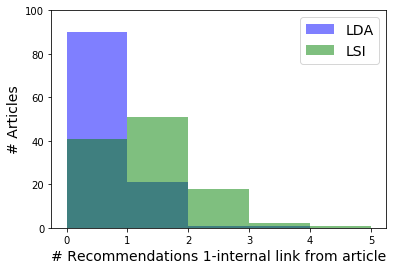

In [18]:
plt.hist(results_n_df['d1_lda_overlap'].dropna(), bins=[0,1,2,3,4,5], color='b', alpha=0.5, label='LDA');
plt.hist(results_n_df['d1_lsi_overlap'].dropna(), bins=[0,1,2,3,4,5], color='g', alpha=0.5, label='LSI');
plt.xlabel('# Recommendations 1-internal link from article', fontsize=14)
plt.ylabel('# Articles', fontsize=14)
plt.ylim(0,100)
plt.legend(fontsize=14)
plt.tight_layout
plt.savefig('../figures/number_recs_1-link_from_title.png', transparent=True)

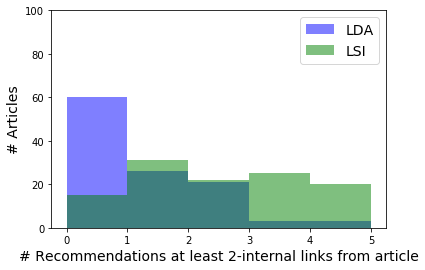

In [19]:
plt.hist(results_n_df['d2_lda_overlap'].dropna(), bins=[0,1,2,3,4,5], color='b', alpha=0.5, label='LDA');
plt.hist(results_n_df['d2_lsi_overlap'].dropna(), bins=[0,1,2,3,4,5], color='g', alpha=0.5, label='LSI');
plt.xlabel('# Recommendations at least 2-internal links from article', fontsize=14)
plt.ylabel('# Articles', fontsize=14)
plt.ylim(0,100)
plt.legend(fontsize=14)
plt.tight_layout
plt.savefig('../figures/number_recs_2-links_from_title.png', transparent=True)

In [20]:
results_pct_df = pd.DataFrame(index=lsi_df.index, columns=['d1_lda_pct_overlap', 'd1_lsi_pct_overlap',\
                                                   'd2_lda_pct_overlap', 'd2_lsi_pct_overlap'])
for wiki_id in lda_df.index:
    results_dict = get_percent_overlap_of_results_and_links(wiki_id)
    for key in results_dict.keys():
        results_pct_df.loc[wiki_id, key] = results_dict[key]

results_pct_df.head(20)

,d1_lda_pct_overlap,d1_lsi_pct_overlap,d2_lda_pct_overlap,d2_lsi_pct_overlap
1467938,0,0.333333,0.2,0.2
275388,0,1,0,0.2
2352562,NaN,NaN,0.4,0.4
17021807,0,1,0,0.6
20777185,0,1,0,0.6
4020758,0.5,1,0.2,0.4
17430047,0,0.5,0.2,0.2
2676271,0,1,0.2,0.6
22044074,NaN,NaN,0,0.5
19282291,0,1,0,0.2


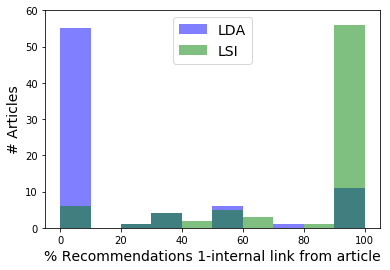

In [21]:
plt.hist(results_pct_df['d1_lda_pct_overlap'].dropna()*100, color='b', alpha=0.5, label='LDA');
plt.hist(results_pct_df['d1_lsi_pct_overlap'].dropna()*100, color='g', alpha=0.5, label='LSI');
plt.ylim(0,60)
plt.xlabel('% Recommendations 1-internal link from article', fontsize=14)
plt.ylabel('# Articles', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout
plt.savefig('../figures/pct_recs_1-link_from_title.png', transparent=True)

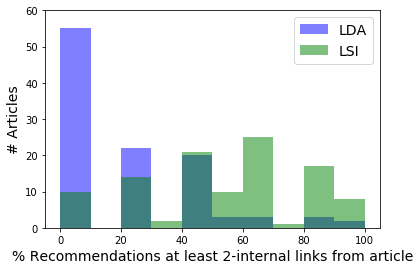

In [22]:
plt.hist(results_pct_df['d2_lda_pct_overlap'].dropna()*100, \
         color='b', alpha=0.5, label='LDA');
plt.hist(results_pct_df['d2_lsi_pct_overlap'].dropna()*100, \
         color='g', alpha=0.5, label='LSI');
plt.ylim(0,60)
plt.xlabel('% Recommendations at least 2-internal links from article', fontsize=14)
plt.ylabel('# Articles', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout
plt.savefig('../figures/pct_recs_2-links_from_title.png', transparent=True)

In [23]:
all_d1_links = []
all_d2_links = []
for wiki_id in lda_df.index:
    all_d1_links.extend(list_from_string(link_df.loc[wiki_id, 'dist1_titles']))
    all_d2_links.extend(list_from_string(link_df.loc[wiki_id, 'dist2_titles']))
all_d1_links = list(set(all_d1_links))
all_d2_links = list(set(all_d2_links))

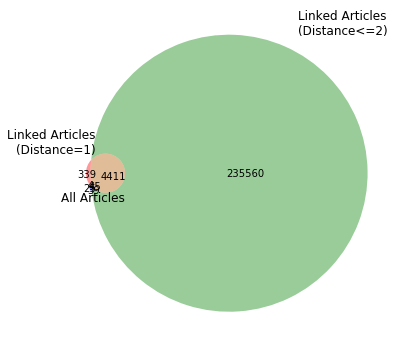

In [24]:
fig = plt.figure(figsize=(6,6))
venn3([set(all_d1_links), set(all_d2_links), set(all_titles)],\
      ('Linked Articles\n(Distance=1)', 'Linked Articles\n(Distance<=2)', 'All Articles'));
plt.savefig('../figures/venn_diagram_linked_articles.png', transparent=True)

In [25]:
all_d1_links = []
all_d2_links = []
for wiki_id in lda_df.index:
    all_d1_links.extend(list_from_string(link_df.loc[wiki_id, 'dist1_titles']))
    all_d2_links.extend(list_from_string(link_df.loc[wiki_id, 'dist2_titles']))
all_d2_links.extend(all_d1_links)
all_d1_links = list(set.intersection(set(all_d1_links), set(all_titles)))
all_d2_links = list(set.intersection(set(all_d2_links), set(all_titles)))

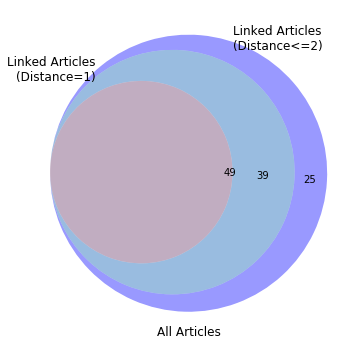

In [26]:
fig = plt.figure(figsize=(6,6))
venn3([set(all_d1_links), set(all_d2_links), set(all_titles)],\
      ('Linked Articles\n(Distance=1)', 'Linked Articles\n(Distance<=2)', 'All Articles'));
plt.savefig('../figures/subset_venn_diagram_linked_articles.png', transparent=True)

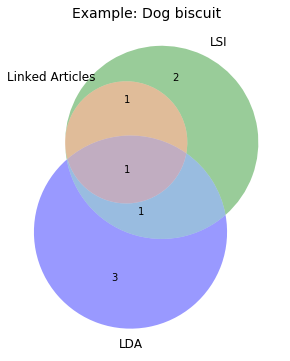

In [27]:
fig = plt.figure(figsize=(6,6))
venn3([set.intersection(set(test_links), set(all_titles)), set(test_lsi_recs), set(test_lda_recs)],\
      ('Linked Articles', 'LSI', 'LDA'));
plt.title('Example: %s' % (link_df.loc[test_ind, 'title']), fontsize=14)
plt.savefig('../figures/dog_biscuit_model_comparison.png', transparent=True)

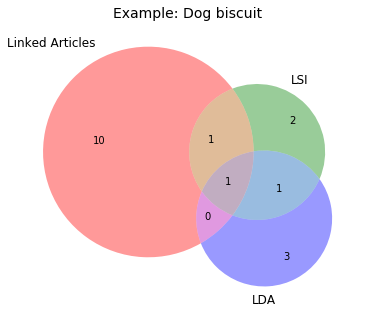

In [28]:
fig = plt.figure(figsize=(6,6))
venn3([set(test_links), set(test_lsi_recs), set(test_lda_recs)],\
      ('Linked Articles', 'LSI', 'LDA'));
plt.title('Example: %s' % (link_df.loc[test_ind, 'title']), fontsize=14)
plt.savefig('../figures/dog_biscuit_model_comparison_all.png', transparent=True)

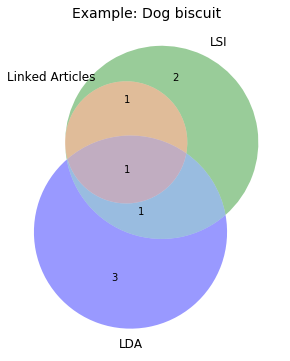

In [29]:
fig = plt.figure(figsize=(6,6))
venn3([set.intersection(set(test_links), set(all_titles)), set(test_lsi_recs), set(test_lda_recs)],\
      ('Linked Articles', 'LSI', 'LDA'));
plt.title('Example: %s' % (link_df.loc[test_ind, 'title']), fontsize=14)
plt.savefig('../figures/dog_biscuit_model_comparison_2linkdist.png', transparent=True)

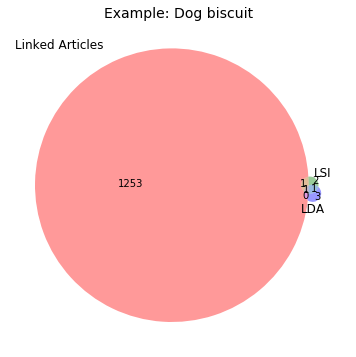

In [30]:
fig = plt.figure(figsize=(6,6))
venn3([set(test_2d_links), set(test_lsi_recs), set(test_lda_recs)],\
      ('Linked Articles', 'LSI', 'LDA'));
plt.title('Example: %s' % (link_df.loc[test_ind, 'title']), fontsize=14)
plt.savefig('../figures/dog_biscuit_model_comparison_all_2_link_dist.png', transparent=True)